In [7]:
!pip install pytrends

In [22]:
from pytrends.request import TrendReq

pytrends = TrendReq()

kw_list = ["AI", "Chandrayaan", "India vs England"]  # Your topics here
pytrends.build_payload(kw_list, geo='IN', timeframe='now 1-d')

data = pytrends.interest_over_time()
print(data.head())


                     AI  Chandrayaan  India vs England  isPartial
date                                                             
2025-08-05 13:20:00  93            0                17      False
2025-08-05 13:28:00  84            1                17      False
2025-08-05 13:36:00  78            0                16      False
2025-08-05 13:44:00  78            0                17      False
2025-08-05 13:52:00  87            0                17      False


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [23]:
import pandas as pd
from pytrends.request import TrendReq
import time

# Initialize pytrends
pytrends = TrendReq(hl='en-IN', tz=330)  # Timezone offset for IST (+5:30)

# Define your search terms
keywords = ['AI', 'Chandrayaan', 'India vs England']

# Build payload
pytrends.build_payload(keywords, cat=0, timeframe='now 1-H', geo='IN', gprop='')

# Get interest over time
try:
    df = pytrends.interest_over_time()
    if not df.empty:
        pd.set_option('display.max_columns', None)
        print(df.tail())

        # Save to CSV
        df.to_csv("trending_interest_over_time.csv")
        print("\nData saved to 'trending_interest_over_time.csv'")
    else:
        print("No data received from Google Trends.")
except Exception as e:
    print(f"An error occurred: {e}")


                      AI  Chandrayaan  India vs England  isPartial
date                                                              
2025-08-06 13:20:00   87            0                13      False
2025-08-06 13:21:00   93            0                12      False
2025-08-06 13:22:00   86            0                12      False
2025-08-06 13:23:00   98            0                13      False
2025-08-06 13:24:00  100            0                10       True

Data saved to 'trending_interest_over_time.csv'


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


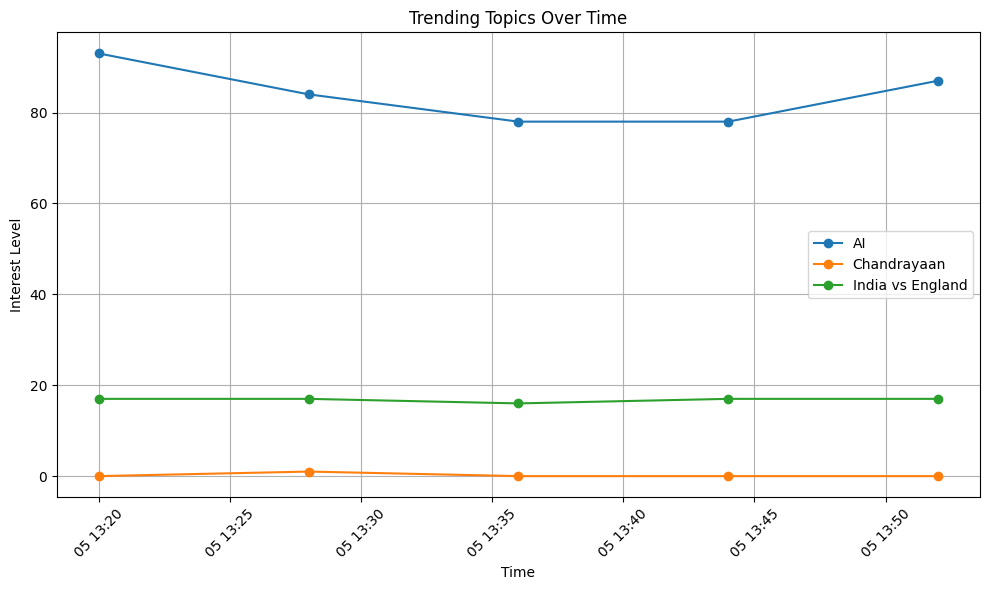

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "date": [
        "2025-08-05 13:20:00",
        "2025-08-05 13:28:00",
        "2025-08-05 13:36:00",
        "2025-08-05 13:44:00",
        "2025-08-05 13:52:00",
    ],
    "AI": [93, 84, 78, 78, 87],
    "Chandrayaan": [0, 1, 0, 0, 0],
    "India vs England": [17, 17, 16, 17, 17],
}

# Convert to DataFrame
df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
for topic in df.columns:
    plt.plot(df.index, df[topic], marker='o', label=topic)

plt.title("Trending Topics Over Time")
plt.xlabel("Time")
plt.ylabel("Interest Level")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
pip install dash dash-bootstrap-components plotly pytrends pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 14.0 MB/s eta 0:00:00


In [29]:
import dash
from dash import html, dcc
from dash.dependencies import Output, Input
import plotly.graph_objs as go
import pandas as pd
import random
from datetime import datetime

# Simulate trending data
def get_trending_data():
    # This is dummy data to mimic Google Trends (since pytrends is failing)
    now = datetime.now().strftime("%H:%M:%S")
    topics = ['AI', 'Blockchain', 'Cricket', 'iPhone', 'Elections', 'Weather', 'Netflix', 'Jobs', 'Bitcoin', 'Space']
    scores = [random.randint(50, 100) for _ in topics]
    return pd.DataFrame({'Topic': topics, 'Score': scores, 'Time': now})

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Trending Topics Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Real-time Trending Topics (Simulated)", style={'textAlign': 'center'}),
    dcc.Graph(id='bar-plot'),
    dcc.Interval(id='interval-component', interval=5000, n_intervals=0),  # 5 seconds
])

# Callback to update graph
@app.callback(
    Output('bar-plot', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_graph(n):
    df = get_trending_data()

    fig = go.Figure(
        data=[go.Bar(x=df['Topic'], y=df['Score'], marker_color='indigo')],
        layout=go.Layout(
            title=f"Trending Topics at {df['Time'][0]}",
            yaxis=dict(range=[0, 100]),
            xaxis_title="Topic",
            yaxis_title="Score"
        )
    )
    return fig

# Run server
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>